<a href="https://colab.research.google.com/github/AryanSanghi/Back-Pain-Classification/blob/main/BackPainClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading dataset

In [ ]:
from google.colab import files
files.upload()  # upload kaggle.json when prompted

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d sammy123/lower-back-pain-symptoms-dataset

!unzip lower-back-pain-symptoms-dataset.zip




Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/sammy123/lower-back-pain-symptoms-dataset
License(s): unknown
  0% 0.00/19.8k [00:00<?, ?B/s]
100% 19.8k/19.8k [00:00<00:00, 69.6MB/s]
Archive:  lower-back-pain-symptoms-dataset.zip
  inflating: Dataset_spine.csv       


In [ ]:
import pandas as pd

df = pd.read_csv("Dataset_spine.csv")  # or adjust filename if different
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


**Preprocessing Data**

In [ ]:

df["target"] = (df["Class_att"] == "Normal").astype(int)
df = df.drop(columns="Class_att")
df = df.drop(columns="Unnamed: 13")

df.head()
#df.tail()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = [col for col in df.columns if col != "target"]
df[features] = scaler.fit_transform(df[features])

**Converting to Tensors**

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split

# Convert DataFrame to tensors
X = torch.tensor(df.drop("target", axis=1).values, dtype=torch.float32)
y = torch.tensor(df["target"].values, dtype=torch.float32).unsqueeze(1)  # shape (N,1)

dataset = TensorDataset(X, y)

# Split into train/test
train_size = int(0.8 * len(dataset))
test_size  = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=32)

In [ ]:
df["target"].value_counts(normalize=True)

,proportion
target,
0,0.677419
1,0.322581


In [ ]:
"""
pos_weight = torch.tensor([df["target"].value_counts()[0] / df["target"].value_counts()[1]])
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
"""

'\npos_weight = torch.tensor([df["target"].value_counts()[0] / df["target"].value_counts()[1]])\ncriterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)\n'

**Defining model**

In [ ]:
import torch.nn as nn

class BinaryClassifierComplex(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifierComplex, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

class BinaryClassifierSimple(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifierSimple, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)


In [ ]:
model = BinaryClassifierComplex(input_dim=X.shape[1])

In [ ]:

import torch.optim as optim

criterion = nn.BCELoss()  # Binary Cross-Entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)



Epoch [1/40] - Loss: 0.6490 - Accuracy: 70.97
Epoch [2/40] - Loss: 0.6420 - Accuracy: 70.97
Epoch [3/40] - Loss: 0.6362 - Accuracy: 70.97
Epoch [4/40] - Loss: 0.6267 - Accuracy: 70.97
Epoch [5/40] - Loss: 0.6206 - Accuracy: 70.97
Epoch [6/40] - Loss: 0.6054 - Accuracy: 70.97
Epoch [7/40] - Loss: 0.5906 - Accuracy: 70.97
Epoch [8/40] - Loss: 0.5734 - Accuracy: 70.97
Epoch [9/40] - Loss: 0.5574 - Accuracy: 69.35
Epoch [10/40] - Loss: 0.5377 - Accuracy: 70.97
Epoch [11/40] - Loss: 0.5143 - Accuracy: 74.19
Epoch [12/40] - Loss: 0.4992 - Accuracy: 74.19
Epoch [13/40] - Loss: 0.4803 - Accuracy: 75.81
Epoch [14/40] - Loss: 0.4668 - Accuracy: 77.42
Epoch [15/40] - Loss: 0.4574 - Accuracy: 77.42
Epoch [16/40] - Loss: 0.4358 - Accuracy: 80.65
Epoch [17/40] - Loss: 0.4267 - Accuracy: 83.87
Epoch [18/40] - Loss: 0.4178 - Accuracy: 87.10
Epoch [19/40] - Loss: 0.4068 - Accuracy: 87.10
Epoch [20/40] - Loss: 0.4003 - Accuracy: 87.10
Epoch [21/40] - Loss: 0.3890 - Accuracy: 87.10
Epoch [22/40] - Loss: 

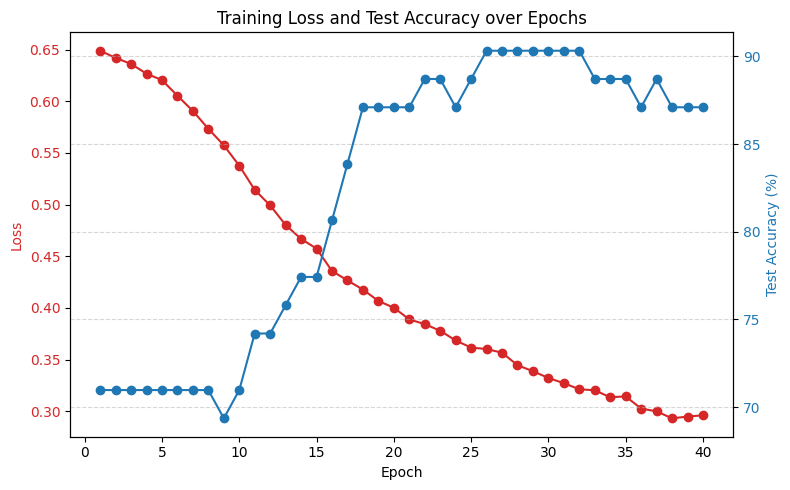

In [ ]:
import matplotlib.pyplot as plt

epochs = 40
torch.manual_seed(42)

test_accuracies = []  # 🧠 store accuracy each epoch
train_losses = []     # (optional) track training loss too

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Step the scheduler if used
    scheduler.step(epoch=epoch)

    # Evaluate test accuracy using your test() function
    acc = test()  # ✅ assumes your test() returns accuracy as a float
    test_accuracies.append(acc)
    train_losses.append(total_loss / len(train_loader))

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {total_loss/len(train_loader):.4f} - Accuracy: {acc:.2f}")

# 📈 Plot accuracy after training
fig, ax1 = plt.subplots(figsize=(8, 5))

# --- Left y-axis: Loss ---
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(range(1, epochs+1), train_losses, color=color, marker='o', label='Train Loss')
ax1.tick_params(axis='y', labelcolor=color)

# --- Right y-axis: Accuracy ---
ax2 = ax1.twinx()  # create a second y-axis sharing the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Test Accuracy (%)', color=color)
ax2.plot(range(1, epochs+1), test_accuracies, color=color, marker='o', label='Test Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

# --- Titles and grid ---
plt.title("Training Loss and Test Accuracy over Epochs")
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:

model.eval()
correct, total = 0, 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        preds = (model(X_batch) > 0.5).float()
        total += y_batch.size(0)
        correct += (preds == y_batch).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")



Accuracy: 87.10%


In [ ]:
def test():
  model.eval()
  correct, total = 0, 0

  with torch.no_grad():
      for X_batch, y_batch in test_loader:
          preds = (model(X_batch) > 0.5).float()
          total += y_batch.size(0)
          correct += (preds == y_batch).sum().item()
  return 100 * correct / total

**Trying Ensemble Models**

idea worth exploring, but on a more complex dataset where more model variety is possible/reasonable

In [ ]:
import torch
import torch.nn as nn

def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=30, device="cpu", scheduler=None, verbose=False):
    """
    Trains a PyTorch model for binary classification (ensemble-ready).

    Args:
        model: The PyTorch model instance to train.
        train_loader: DataLoader for training data.
        test_loader: DataLoader for evaluation.
        criterion: Loss function (e.g., nn.BCELoss() or nn.BCEWithLogitsLoss()).
        optimizer: Optimizer (e.g., Adam).
        epochs: Number of epochs (default: 30).
        device: "cpu" or "cuda" for training device.
        scheduler: Optional learning rate scheduler (default: None).
        verbose: If True, prints progress each epoch.

    Returns:
        model: The trained model (ready for ensembling).
        test_acc: Final test accuracy (float).
    """
    model = model.to(device)

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # optional scheduler step
        if scheduler:
            scheduler.step()

        # validation pass (for tracking)
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                preds = (model(X_batch) > 0.5).float()
                correct += (preds == y_batch).sum().item()
                total += y_batch.size(0)

        acc = 100 * correct / total
        if verbose:
            print(f"Epoch [{epoch+1}/{epochs}] | Loss: {total_loss/len(train_loader):.4f} | Test Acc: {acc:.2f}%")

    return model, acc

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
ensemble_models = []

for seed in [0, 1, 2, 3, 4]:
    torch.manual_seed(seed)

    model = BinaryClassifierComplex(input_dim=X.shape[1])
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    trained_model, acc = train_model(
        model,
        train_loader,
        test_loader,
        criterion,
        optimizer=optim.Adam(model.parameters(), lr=0.01+0.002*(seed-2.5)),
        epochs=30,
        device=device,
        verbose=True
    )

    ensemble_models.append(trained_model)
    print(f"✅ Model {seed} finished with Test Accuracy: {acc:.2f}%")

for seed in [5, 6, 7, 8, 9]:
    torch.manual_seed(seed)

    model = BinaryClassifierSimple(input_dim=X.shape[1])
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    trained_model, acc = train_model(
        model,
        train_loader,
        test_loader,
        criterion,
        optimizer=optim.Adam(model.parameters(), lr=0.01+0.002*(seed-2.5)),
        epochs=30,
        device=device,
        scheduler=scheduler,
        verbose=True
    )

    ensemble_models.append(trained_model)
    print(f"✅ Model {seed} finished with Test Accuracy: {acc:.2f}%")


Epoch [1/30] | Loss: 0.6723 | Test Acc: 70.97%
Epoch [2/30] | Loss: 0.6153 | Test Acc: 70.97%
Epoch [3/30] | Loss: 0.5539 | Test Acc: 70.97%
Epoch [4/30] | Loss: 0.5057 | Test Acc: 72.58%
Epoch [5/30] | Loss: 0.4736 | Test Acc: 69.35%
Epoch [6/30] | Loss: 0.4450 | Test Acc: 75.81%
Epoch [7/30] | Loss: 0.4101 | Test Acc: 82.26%
Epoch [8/30] | Loss: 0.3682 | Test Acc: 83.87%
Epoch [9/30] | Loss: 0.3398 | Test Acc: 83.87%
Epoch [10/30] | Loss: 0.3002 | Test Acc: 80.65%
Epoch [11/30] | Loss: 0.2718 | Test Acc: 80.65%
Epoch [12/30] | Loss: 0.2551 | Test Acc: 80.65%
Epoch [13/30] | Loss: 0.2369 | Test Acc: 80.65%
Epoch [14/30] | Loss: 0.2127 | Test Acc: 83.87%
Epoch [15/30] | Loss: 0.1961 | Test Acc: 83.87%
Epoch [16/30] | Loss: 0.1777 | Test Acc: 82.26%
Epoch [17/30] | Loss: 0.1729 | Test Acc: 83.87%
Epoch [18/30] | Loss: 0.1555 | Test Acc: 83.87%
Epoch [19/30] | Loss: 0.1402 | Test Acc: 85.48%
Epoch [20/30] | Loss: 0.1338 | Test Acc: 85.48%
Epoch [21/30] | Loss: 0.1265 | Test Acc: 83.87%
E

In [ ]:
model.eval()
all_preds = []

X_test = torch.stack([x for x, _ in test_ds])
y_test = torch.stack([y for _, y in test_ds])

with torch.no_grad():
    for model in ensemble_models:
        preds = model(X_test.to(device))
        all_preds.append(preds)

# Stack and average predictions
ensemble_pred = torch.mean(torch.stack(all_preds), dim=0)
final_pred = (ensemble_pred > 0.5).float()

# Evaluate
accuracy = (final_pred.cpu() == y_test).float().mean().item() * 100
print(f"\n🏆 Ensemble Accuracy: {accuracy:.2f}%")



🏆 Ensemble Accuracy: 83.87%


In [ ]:
accuracy = (final_pred == y_test).float().mean()
print(f"Ensemble accuracy: {accuracy.item() * 100:.2f}%")


Ensemble accuracy: 83.87%
